In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
plt.rcParams.update({'font.size': 20})

datasets = {
    "CAPOD": "/scratch/users/branisj/CAPOD_sampled_1024/color/**/*.ply",
    "s3dis": "/scratch/users/branisj/stanford_normal_1024/*.ply",
    "blensor_no_noise": "/scratch/users/branisj/blensor_no_noise_normal_1024/*.ply",
    "blensor": "/scratch/users/branisj/blensor_normal_1024/*.ply"
}

In [121]:
def get_count(f):
    found_count = False
    while not found_count:
        line = f.readline()
        if line.startswith(b"element vertex"):
            found_count = True
    count = int(line.decode("utf-8").split(" ")[2])
    return count

def collect_counts(g):
    counts = []
    for filename in sorted(glob.glob(g)):
        with open(filename, "rb") as f:
            counts.append(get_count(f))
    return counts
        

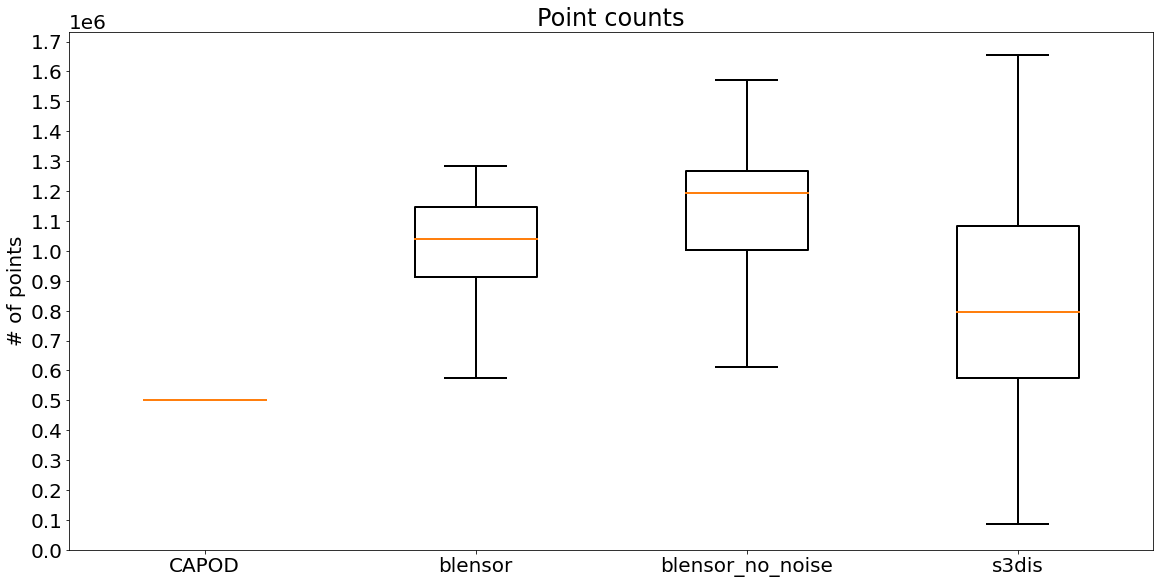

In [140]:

df = pd.DataFrame()
for dataset, g in datasets.items():
    counts = collect_counts(g)
    partial_df = pd.DataFrame([{"dataset": dataset, "Point counts": count } for count in counts])
#     print(partial_df.head())
#     partial_df = partial_df.set_index("dataset")
    df = pd.concat([df, partial_df])
# df.head(200)
fig, ax = plt.subplots(constrained_layout=True)
fig.set_figwidth(16)
fig.set_figheight(8)
df.plot(ax=ax,
        kind="box",
        by="dataset",
        medianprops=dict(linestyle='-', linewidth=2),
        boxprops=dict(linestyle='-', linewidth=2),
        whiskerprops=dict(linestyle='-', linewidth=2),
        capprops=dict(linestyle='-', linewidth=2),
        column="Point counts",
        yticks=range(0, 1800000, 100000),
        ylabel="# of points",
        xlabel="Dataset",
        showfliers=False,
        grid=False)
fig.savefig("plots/point_counts.png", bbox_inches='tight', pad_inches=1)
